<a href="https://colab.research.google.com/github/djdongjin/Distributed-Booking-System/blob/master/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization
## Misclassificated images and Confusing classified images

In [0]:
# connect google drive
from google.colab import drive
drive.mount('/content/gdrive')
# the folder I use
!ls /content/gdrive/My\ Drive/IFT6135/datasets
path="/content/gdrive/My Drive/IFT6135/datasets/"
output_path="/content/gdrive/My Drive/IFT6135/plot/"
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import glob

In [0]:
path="/content/gdrive/My Drive/IFT6135/"
data_path=path+"ift6135h19/trainset/"

import matplotlib.pyplot as plt
from skimage import io
import torchvision
import torch

%matplotlib inline

import matplotlib as mpl
mpl.rcParams['axes.grid'] = False
mpl.rcParams['image.interpolation'] = 'nearest'
mpl.rcParams['figure.figsize'] = 10, 10

def show_image(img):
  plt.imshow(img)
  plt.axis('off')
  
def show_dataset(dataset,n=1):
  img = np.hstack((np.hstack((np.asarray(dataset[i]) for _ in range(n)))
                   for i in range(len(dataset))))
  plt.imshow(img)
  plt.axis('off')
  
transforms_plot = torchvision.transforms.Compose([
    torchvision.transforms.Resize((224,224))
  ])
def plot_image(image_path="/content/gdrive/My Drive/IFT6135/demoeimage/pytorch-examples/data/classification/cats/adorable-animal-blur-617278.jpg"):

  image=io.imread(image_path, transform=transforms_plot)
  show_image(image)
  
  
# '''# ! mkdir /content/gdrive/My\ Drive/IFT6135/demoeimage/
# # ! cd /content/gdrive/My\ Drive/IFT6135/demoeimage/ && git clone https://github.com/fabioperez/pytorch-examples/
# ! cd /content/gdrive/My\ Drive/IFT6135/demoeimage/pytorch-examples/data/classification/cats && ls
# image_path="/content/gdrive/My Drive/IFT6135/demoeimage/pytorch-examples/data/classification/cats/adorable-animal-blur-617278.jpg"'''

In [0]:
with open(path+"state_dict.pickle","rb") as f:
  state_dict=pickle.load(f)
mpl.rcParams['figure.figsize'] = 5,25

In [0]:
! cd /content/gdrive/My\ Drive/IFT6135/ift6135h19/trainset/Cat/ && ls | grep "780"
! cd /content/gdrive/My\ Drive/IFT6135/ift6135h19/trainset/Dog/ && ls | grep "780"

In [0]:
# sometimes doesn't work due to the colab
# re-running the above cell and this cell      can slove problems

top_cat=state_dict["top0"]
dataset_tc=[]
for image_path in top_cat:
  image=io.imread(data_path+"Cat/"+image_path[0], transform=transforms_plot)
  dataset_tc.append(image)

top_dog=state_dict["top1"]
dataset_td=[]
for image_path in top_dog:
  image=io.imread(data_path+"Dog/"+image_path[0], transform=transforms_plot)
  dataset_td.append(image)

least_dog=state_dict["least1"]
dataset_ld=[]
for image_path in least_dog:
  image=io.imread(data_path+"Dog/"+image_path[0], transform=transforms_plot)
  dataset_ld.append(image)
 

least_cat=state_dict["least0"]
dataset_lc=[]
for image_path in least_cat:
  image=io.imread(data_path+"Cat/"+image_path[0], transform=transforms_plot)
  dataset_lc.append(image)
  image=None 

## Top Confusing Images

Those images get the output probabilities of two labels close to 0.5.
In other words, the model is confused by them and not confident to make prediction.

We do analysis on those images and infer some possible reasons.


### Top 5 Confusing images of Cats

**The probability of two labels are close to 0.5**

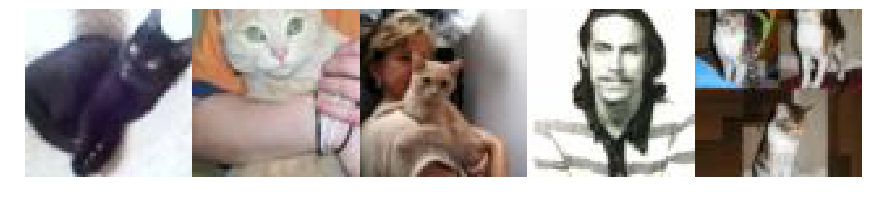

In [0]:
mpl.rcParams['figure.figsize'] = 15,20

show_dataset(dataset_tc)

### Analysis on Confusing examples of Cats


There are three types of images among them.

1.   Not a cat or a dog. (4)
     
     It is not out of our expectation that our model cannot figure out what it is.
2.   A cat on arms (2,3)

  Our model is confused by the arms from humans. It cannot distinguish cats from arms perfectly. The arms are affecting the model's classification on cats or dogs.
  
  
3. The black cat (1)

The first image is confusing probably because the cat is all black in a low resolution image. The model cannot capture features from this kind of images well.

4. Multi-Cats

This kind of images are confusing to our model because of multi-objects. The last image has three cats and each of them is small in the image.

Due to the low resolution, it is also hard for human to identified them. The multi-objects in the image may affect our model as well. However, human can guess according to the posture of objects, and obviously, our model cannot do so.

### Top 5 Confusing images of Dogs

**The predicted probability of two labels are close to 0.5**

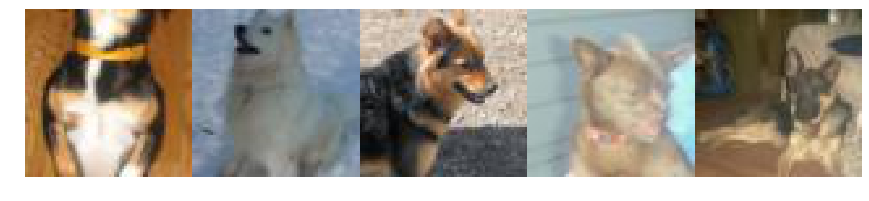

In [0]:
show_dataset(dataset_td)

### Analysis on Confusing examples of Dogs

Similar with the confusing images of cats.
     
1.   A Dog with human (3,5)

  Our model is confused by humans. It cannot distinguish dogs from arms or legs perfectly. 
  
2.  The black Dog (3)

  The dog is all black. In a low-resulotion image, our model cannot extract sufficient features from the image.

3.  Multi-objects (2,4)

  There are more than one objects in each image. It is hard for our model to classify the image.

4. Only the Back of the Object.(2)

  To be noticed here, image 2nd only has the backs of dogs. This may be confusing because most training examples are with the face or front of dogs or cats.

### Conclusion of Confusing examples

Most of the examples have parts of human or more than one cats(dogs).

The cats and dogs with pure color fur are confusing as well


## Top Misclassified Images

Those images are classified to the wrong label with high probabilities

We do analysis on those images and infer some reasons.


### Top 5 Misclassified Images of Cats
**Completely misclassified**

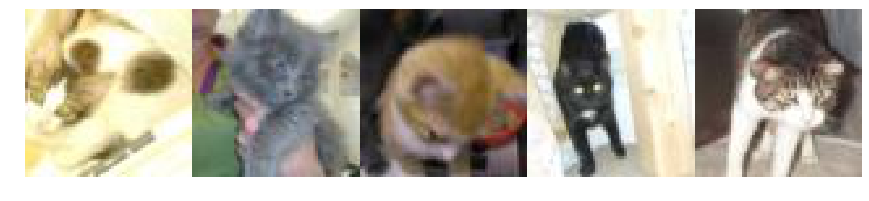

In [0]:
show_dataset(dataset_lc)

### Analysis on the top misclassified examples of Cats
 
Those cats let our model consider them as dogs.

Here are the possible reasons.

1. Most of the cats in the images are all same color. In the low-resolution images, they are quite blurry. 

2. They are either held by hands or standing like dogs with four legs straight.


### Top 5 Misclassified Images of Dogs
**Completely misclassified**

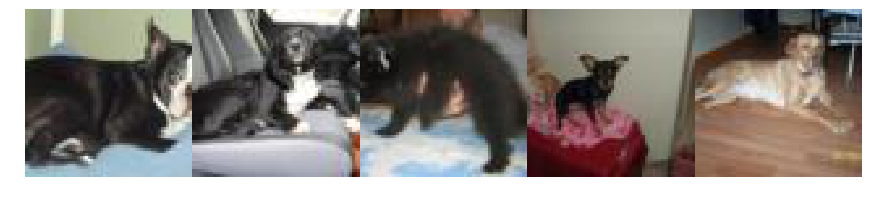

In [0]:
show_dataset(dataset_ld)

### Analysis on the top misclassified examples of Dogs
 
Those dogs let our model consider them as cats.

Here are the possible reasons.

1. Most of the dogs in the images are all same color. In the low-resolution images, they are quite blurry. 

2. Most of them are lying down like cats.


### Conclusion of Top misclassified examples

Most of the cats(dogs) are blurry due to the color and resolution with postures that dogs(cats) frequently have.

## Visualization on Kernels

Here we visualize the first layer kernels and the last layer kernels.

We also visualize the features got by the first layer kernel with image 3702.Cat.jpg.

In [0]:
kernel_1=state_dict["conv_first"]
imgs=[]
imgs.append(np.ones([1,33,3]))
for row in range(4):
  imgs_=[]
  imgs_.append(np.ones([3,1,3]))
  for col in range(8):
    imgs_.append(kernel_1[row*8+col].transpose())
    imgs_.append(np.ones([3,1,3]))
  imgs.append(np.hstack(imgs_))
  imgs.append(np.ones([1,33,3]))
img=np.vstack(imgs)


### Visualization of The first layer Kernels

We visualize the weights of 32 first layer kernels.

Obviously, they have different weights and different focuses on the images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


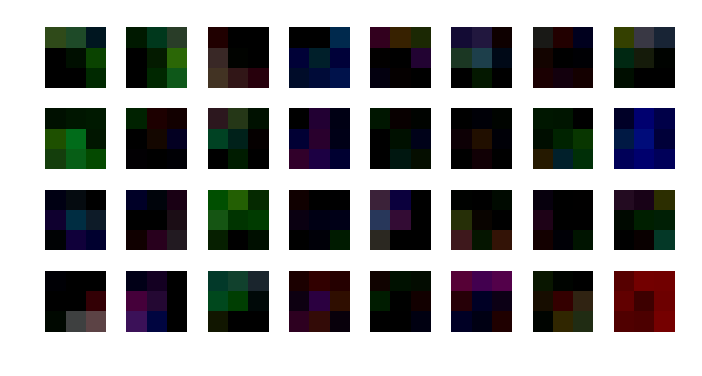

In [0]:
mpl.rcParams['figure.figsize'] = 12, 20

show_image(img)

In [0]:
kernel_2=state_dict["conv_last"]
imgs=[]
max_=np.min(kernel_2)
imgs.append(max_*np.ones([1,1025]))

for row in range(256):
  imgs_=[]
  imgs_.append(max_*np.ones([3,1]))
  for col in range(256):
    imgs_.append(kernel_2[row,col,:,:])
    imgs_.append(max_*np.ones([3,1]))
  imgs.append(np.hstack(imgs_))
#   print(imgs[0].shape)
  imgs.append(max_*np.ones([1,1025]))
img=np.vstack(imgs)
img=img


### Show top left 20x20 kernels in the last layer

The last layer has 256 kernels with 256 input channels.

We just visualize parts of them.

According to the plot, we can know that those kernels have different accent on the image.

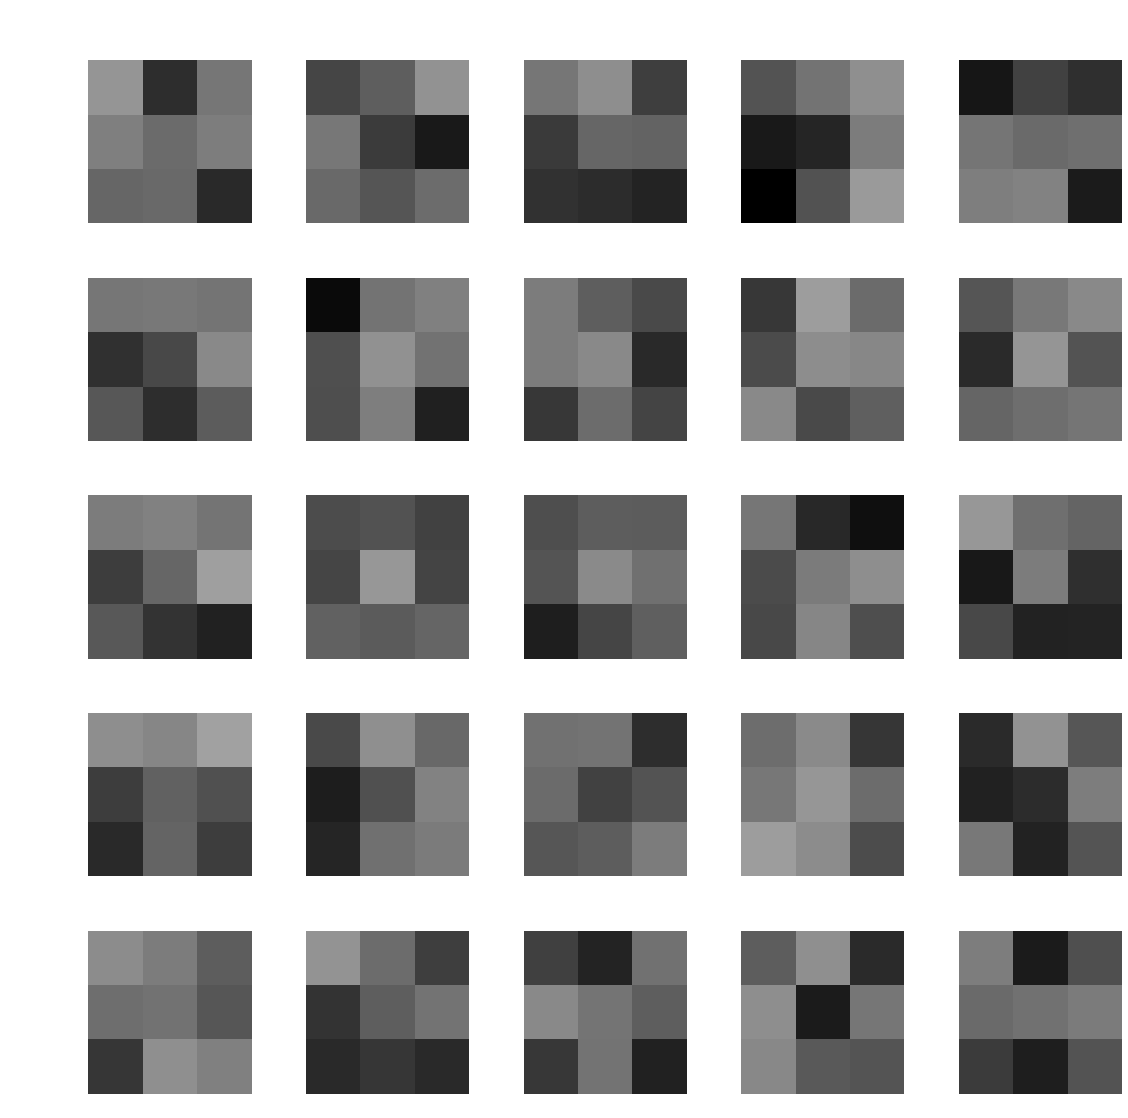

In [0]:
mpl.rcParams['figure.figsize'] = 20,20

show_image(img[0:20,0:20])

In [0]:
import torch.nn as nn
class conv_plot(nn.Module):
  def __init__(self):
    super(conv_plot,self).__init__()
    
    self.conv=nn.Conv2d(in_channels=3,out_channels=32,kernel_size=(3,3),padding=1)
      
  def forward(self,x):
    
    return self.conv(x).squeeze()
    

In [0]:
model=conv_plot()
statedict=model.state_dict()
new_bias=np.zeros(statedict["conv.bias"].shape)
new_weight=kernel_1
statedict["conv.bias"]=torch.tensor(new_bias)
statedict["conv.weight"]=torch.tensor(new_weight)
model.load_state_dict(statedict)
image=io.imread(data_path+"Cat/"+"3702.Cat.jpg", transform=transforms_plot)
image=image.transpose()
image=image[None,:,:]
image=torch.tensor(image,dtype=torch.float32)

images=model.forward(image)
images=images.data()
images=images.data.numpy()
imgs=[]
max_=np.max(images)
imgs.append(max_*np.ones([1,521]))
for row in range(4):
  imgs_=[]
  imgs_.append(max_*np.ones([64,1]))
  for col in range(8):
    imgs_.append(images[row*8+col].transpose())
    imgs_.append(max_*np.ones([64,1]))
  imgs.append(np.hstack(imgs_))
  imgs.append(max_*np.ones([1,521]))
img=np.vstack(imgs)

### The features got in the first Conv Layer

From the features got by the kernels in the first convolutional layer. 

We can see that different kernels capture different features from the image. With those features, the neural network has further processing on them in order to classify images. 



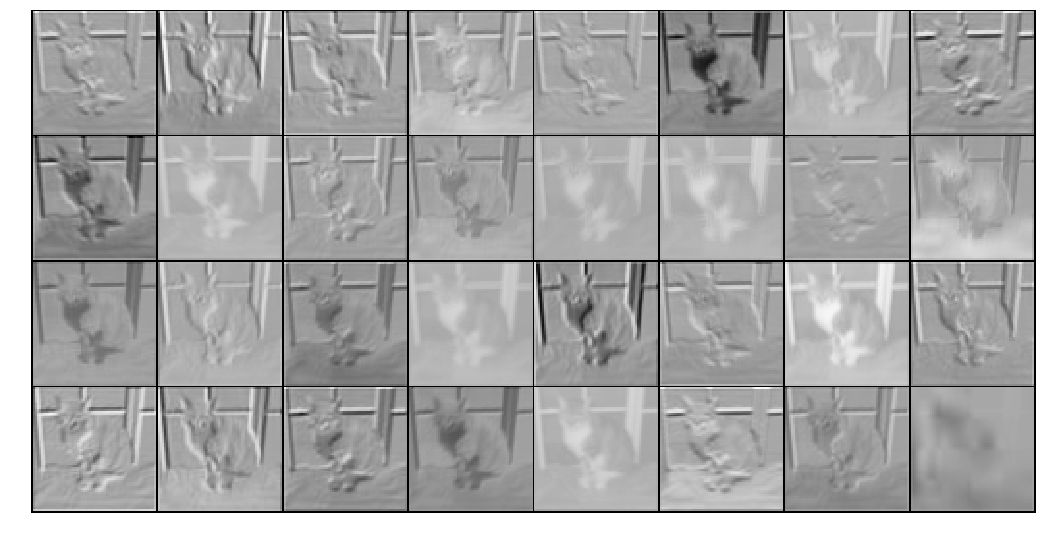

In [0]:
mpl.rcParams['figure.figsize'] = 18,23
show_image(img)

**The original image**

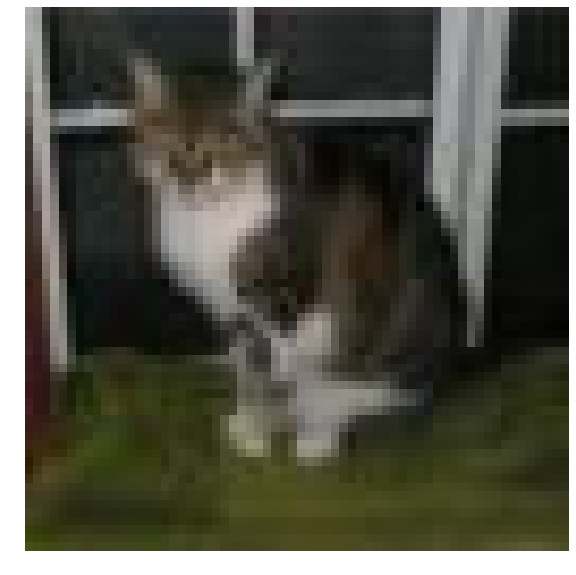

In [0]:
image=io.imread(data_path+"Cat/"+"3702.Cat.jpg", transform=transforms_plot)
mpl.rcParams['figure.figsize'] = 10,10
show_image(image)